In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None

# Exercise 3.1 Georeferenced plots - cartopy: Introduction and scatterplots
prepared by M.Hauser

There used to be two main libraries to plot georeferenced data/ map plots in python - [basemap](https://matplotlib.org/basemap/) and [cartopy](http://scitools.org.uk/cartopy/).

However, [basemap is not developed any further](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement). Therefore we use cartopy in this course.

For starters we will learn how to make scatterplots on maps.

## Import standard libraries

In [2]:
import matplotlib.pyplot as plt
import xarray as xr

We also need to import the coordinate reference system (crs) from cartopy, which is commonly abbreviated as `ccrs`:

In [3]:
import cartopy.crs as ccrs

## Load Data

### Argo floats

We use position and temperature of [argo floats](http://www.argo.ucsd.edu/) for one day. The data was obtained from [ifremer](http://wwz.ifremer.fr/) (Institut français de recherche pour l'exploitation de la mer), from their [ftp repository](ftp://ftp.ifremer.fr/ifremer/argo/geo/).

The relevant data was extracted from the raw file in another [notebook](../data/prepare_argo_float_data.ipynb).


In [4]:
fN = '../data/ARGO_ATL_20171230.nc'
ATL = xr.open_dataset(fN)

fN = '../data/ARGO_IND_20171230.nc'
IND = xr.open_dataset(fN)

fN = '../data/ARGO_PAC_20171230.nc'
PAC = xr.open_dataset(fN)

ATL

<xarray.Dataset>
Dimensions:  (N_PROF: 125)
Dimensions without coordinates: N_PROF
Data variables:
    lon      (N_PROF) float64 ...
    lat      (N_PROF) float64 ...
    TEMP     (N_PROF) float32 ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2018-01-10T13:27:52Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

## First map

To plot a map, we have to specify a `projection` for the axes. We start with the `PlateCarree` projection, which is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection). This projection maps `x` to be the value of the longitude and `y` to be the value of the latitude.

This creates a special kind of axes (a `<cartopy.mpl.geoaxes.GeoAxesSubplot>`) which is derived from the normal `axes`. This axes includes some special methods (which we'll get to know), one of them is `ax.coastlines()` which is an easy way to add the coastlines.

Ok, let's get started:


<GeoAxesSubplot:>

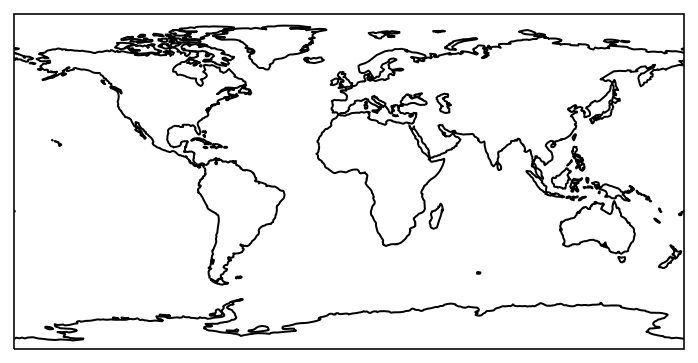

In [5]:
# notice the `()`:
projection = ccrs.PlateCarree()

ax = plt.axes(projection=projection)

ax.coastlines()

# for non-maps this would be: `matplotlib.axes._subplots.AxesSubplot`
ax

`PlateCarree` takes a input parameter, `central_longitude`:

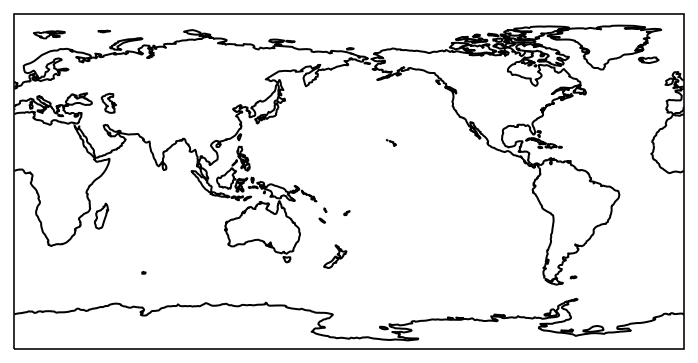

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.coastlines()

## Map subplots

If you want to create multiple subplots using the `plt.subplots` function, this can be done as follows:

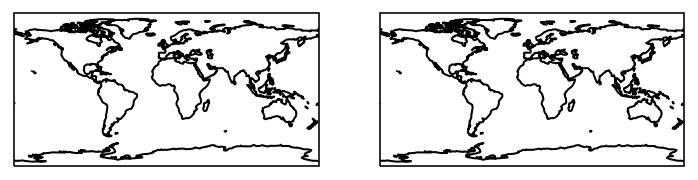

In [7]:
f, axes = plt.subplots(1, 2, subplot_kw=dict(projection=ccrs.PlateCarree()))

for ax in axes:
    ax.coastlines()

Later we have a dedicated exercise to create multiple subplots.

## Adding the position of the argo floats

### Exercise

 * add the position of the argo floats with ax.scatter (`ATL.lon`, `ATL.lat`, etc.)
 
> this restricts the plot area to the position of the floats

 * restore the global view with `ax.set_global()`


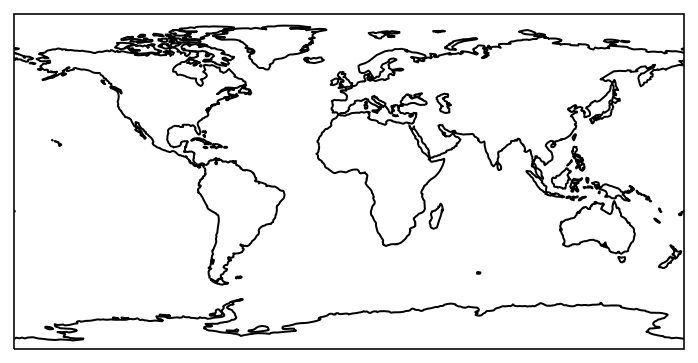

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

# code here

### Solution

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.scatter(ATL.lon, ATL.lat)
ax.scatter(IND.lon, IND.lat)
ax.scatter(PAC.lon, PAC.lat)

ax.set_global()

## Setting the color with a dict

Now all the floats in each ocean have a different color. But we want them to have the same color. So we could of course set `color='green'` for all of them. But if we want to change it, we have to change it for all of them. And it would be just as tedious if we want to add another keyword to all of them. So we could write a function, as we learned in the 'helper functions' exercise. A third possibility is to use a dict and unpack it:


In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(color='green')

ax.scatter(ATL.lon, ATL.lat, **opt)
ax.scatter(IND.lon, IND.lat, **opt)
ax.scatter(PAC.lon, PAC.lat, **opt)

ax.set_global()

### Exercise

 * Set the size of the markers to 15 for all the three oceans (which keyword argument was this again? use `plt.scatter?` to find out.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(color='green')

ax.scatter(ATL.lon, ATL.lat, **opt)
ax.scatter(IND.lon, IND.lat, **opt)
ax.scatter(PAC.lon, PAC.lat, **opt)

ax.set_global()

### Solution

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(color='green', s=15)

ax.scatter(ATL.lon, ATL.lat, **opt)
ax.scatter(IND.lon, IND.lat, **opt)
ax.scatter(PAC.lon, PAC.lat, **opt)

ax.set_global()

### Exercise

 * Color the points according to their temperature (`ATL.TEMP` etc.)
 > You will need to remove the `color=` argument.
 * restrict the range of the colormap to 0...25
 * add a colorbar
 > `colorbar` will require a `mappable`, use `h = ax.scatter`

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(color='green', s=15)

ax.scatter(ATL.lon, ATL.lat, **opt)
ax.scatter(IND.lon, IND.lat, **opt)
ax.scatter(PAC.lon, PAC.lat, **opt)

ax.set_global();

### Solution

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(s=15, vmin=0, vmax=25)

h = ax.scatter(ATL.lon, ATL.lat, c=ATL.TEMP, **opt)
h = ax.scatter(IND.lon, IND.lat, c=IND.TEMP, **opt)
h = ax.scatter(PAC.lon, PAC.lat, c=PAC.TEMP, **opt)

plt.colorbar(h)

ax.set_global()

#### Note 1

 > The colorbar is to big for the map! However, this is not straightforward to correct... You will learn how to do this later.

#### Note 2

 > If the range of the colormap is not set to the same values for the three plots, it will be choosen according to the range of the data, see the next figure:

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(s=15)

h0 = ax.scatter(ATL.lon, ATL.lat, c=ATL.TEMP, **opt)
h1 = ax.scatter(IND.lon, IND.lat, c=IND.TEMP, **opt)
h2 = ax.scatter(PAC.lon, PAC.lat, c=PAC.TEMP, **opt)

plt.colorbar(h0)
plt.colorbar(h1)
plt.colorbar(h2)

ax.set_global()

## Projections

cartopy offers [20ish different projections](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html). Have a look at them. Unfortunately some important projections are missing (e.g. Hammer and Aitoff).

### Exercise
 * redo the plot but select a different projection from the website.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

opt = dict(s=15, vmin=0, vmax=25)

h = ax.scatter(ATL.lon, ATL.lat, c=ATL.TEMP, **opt)
h = ax.scatter(IND.lon, IND.lat, c=IND.TEMP, **opt)
h = ax.scatter(PAC.lon, PAC.lat, c=PAC.TEMP, **opt)

plt.colorbar(h)

ax.set_global()

### Solution

In [ ]:
ax = plt.axes(projection=ccrs.Mollweide())

ax.coastlines()

opt = dict(s=15, vmin=0, vmax=25)

h = ax.scatter(ATL.lon, ATL.lat, c=ATL.TEMP, **opt)
h = ax.scatter(IND.lon, IND.lat, c=IND.TEMP, **opt)
h = ax.scatter(PAC.lon, PAC.lat, c=PAC.TEMP, **opt)

plt.colorbar(h)

ax.set_global()

## `transform`

Something went wrong, the points are all at lon=0, lat=0... This is because now the data coordinates* do not map onto longitude and latitude any more, so we need to tell the plotting function that we are passing lat/ lon data. We do that by passing in a coordinate system with the `transform` keyword:  This enables the geo axes to reproject the plot into the display projection.

(\* Well, not the coordinates of the *data* but the *data coordinates* of the axes.)

### Exercise
 * tell `scatter` that the points needs the the `PlateCarree` `transform`ation.

In [ ]:
ax = plt.axes(projection=ccrs.Mollweide())

ax.coastlines()

opt = dict(s=15, vmin=0, vmax=25)

h = ax.scatter(ATL.lon, ATL.lat, c=ATL.TEMP, **opt)
h = ax.scatter(IND.lon, IND.lat, c=IND.TEMP, **opt)
h = ax.scatter(PAC.lon, PAC.lat, c=PAC.TEMP, **opt)

plt.colorbar(h)

ax.set_global()

### Solution

In [ ]:
ax = plt.axes(projection=ccrs.Mollweide())

ax.coastlines()

opt = dict(s=15, vmin=0, vmax=25, transform=ccrs.PlateCarree())

h = ax.scatter(ATL.lon, ATL.lat, c=ATL.TEMP, **opt)
h = ax.scatter(IND.lon, IND.lat, c=IND.TEMP, **opt)
h = ax.scatter(PAC.lon, PAC.lat, c=PAC.TEMP, **opt)

plt.colorbar(h)

ax.set_global()

Nice, we got our floats back...

## Some more on transform

Most often `transform=ccrs.PlateCarree()` is fine. However, when plotting a line on a map with `plt.plot` this does not plot great circle lines. For this we need `ccrs.Geodetic()`.

Let's fly from Zürich (ZRH) to Vancover (YVR):

In [ ]:
# define location of airports

ZRH = (47.458361, 8.555264)
YVR = (49.196817, -123.180332)

lat = [ZRH[0], YVR[0]]
lon = [ZRH[1], YVR[1]]

# ==========================================

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

# direct line
ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='#ff7f00')

# great circle line
ax.plot(lon, lat, transform=ccrs.Geodetic(), color='#e31a1c', marker='o')

# see comment
ax.set_extent([-135, 20, 10, 90], ccrs.PlateCarree())

# ==========================================

# add labels for airports

textopt = dict(transform=ccrs.PlateCarree(), ha='center', va='top',
               bbox=dict(facecolor='w', edgecolor='none', alpha=0.7))

ax.annotate('ZRH', xy=ZRH[::-1], xytext=(0, -10), textcoords='offset points', **textopt)
ax.annotate('YVR', xy=YVR[::-1], xytext=(0, -10), textcoords='offset points', **textopt)

# adding a slightly textured image of the globe
ax.stock_img();


## `set_extent`

Until now we have not restricted the extent of the plots. While using `set_xlim` and `set_ylim` works for some projections (e.g. PlateCarree), they will fail in other cases. Therefore it is recommended to use `set_extent`: 

    ax.set_extent([xmin, xmax, ymin, ymax], ccrs.PlateCarree())

 > Don't forget to add the coordinate reference system! Else your limits can be off.
 
 
## Side note

When you look closely, you can see that the great circle has some bumps in it. We can display it with higher accurracy.


In [ ]:
PC = ccrs.PlateCarree()
PC.threshold

In [ ]:
PC = ccrs.PlateCarree()

PC.threshold = 0.01

ax = plt.axes(projection=PC)

ax.coastlines()

# great circle line
ax.plot(lon, lat, transform=ccrs.Geodetic(), color='#e31a1c', marker='o')

# set extent
ax.set_extent([-135, 20, 10, 90], ccrs.PlateCarree())

# adding a slightly textured image of the globe
ax.stock_img();

## Features & Natural Earth Data

cartopy can make use of many online geographical data sources. See examples under [Web Services](http://scitools.org.uk/cartopy/docs/latest/gallery.html#web-services).

The best thing about this is that you have access and easy ways to plot all the data available at [naturalearthdata.com](http://www.naturalearthdata.com/). Naturalearth provides high quality geo data for free.

See [naturalearthdata.com/features](http://www.naturalearthdata.com/features/) for all that is available.

For example `ax.coastline()` displays the following data: [110m-coastline](http://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-coastline/).

Note:
> The data is downloaded and stored the first time you use it, so this might take a moment.

In [ ]:
import cartopy.feature as cfeature

In [ ]:
ax = plt.axes(projection=PC)

ax.set_extent([-135, -50, 15, 55], ccrs.PlateCarree())

# ==========================================
# NaturalEarthData

ax.coastlines(resolution='50m', color='k')

# some data is easily accessible
ax.add_feature(cfeature.LAKES, edgecolor='0.1', zorder=100)

# for some data you need to know the name (e.g. the States of the US and Canada):
states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes', '50m')
ax.add_feature(states, edgecolor='#b15928', facecolor='none', lw=0.5)

## Local maps

### Climatological Station Data for Switzerland - Temperature & Precip


Again we will use the climatology of 14 swiss weather stations avaliable from [MeteoSwiss](http://www.meteoswiss.admin.ch/home/climate/past/homogenous-monthly-data.html).

The data has already been [retrieved and postprocessed](../data/prepare_data_MCH.ipynb).

Note
> The outline of Switzerland was also obtained from NaturalEarthData - see [stack overflow](https://stackoverflow.com/a/47885128) or the [data preparation notebook](../data/prepare_data_MCH.ipynb).

In the scatter exercise we did not use a projection - let's redo the plot from there:

In [ ]:
# load outline of switzerland

import netCDF4 as nc

fN = '../data/outline_switzerland.nc'
ch = xr.open_dataset(fN)

# =====================================
    
# load climatological station data

fN = '../data/MCH_clim.nc'
clim = xr.open_dataset(fN)

In [ ]:
# first scale the precipitation to the point size

mn = clim.prec.min()
mx = clim.prec.max()

p_scaled = ((clim.prec - mn) / (mx - mn)) * 200 + 50

## Switerland: `projection=ccrs.PlateCarree()`

This is the same plot as in Exercise 1.3. The only two things that changed are the `projection` and `transform` keywords.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.plot(ch.lon, ch.lat, transform=ccrs.PlateCarree())
h = ax.scatter(clim.lon, clim.lat, c=clim.temp, cmap='RdBu_r', vmax=8, vmin=-8, s=p_scaled, edgecolor='0.5',
               transform=ccrs.PlateCarree(), zorder=3)


plt.colorbar(h)

## Projections again

This looks terrible - but that's how Switzerland looks in the PlateCarree projection! So we need to change the projection - find one that works for regional maps -> [cartopy projections](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).


### Exercise
 * try out `EuroPP`
 * try out `LambertConformal` (with `central_longitude=15`)

In [ ]:
projection = ccrs.PlateCarree()

ax = plt.axes(projection=projection)


ax.plot(ch.lon, ch.lat, transform=ccrs.PlateCarree())
h = ax.scatter(clim.lon, clim.lat, c=clim.temp, cmap='RdBu_r', vmax=8, vmin=-8, s=p_scaled, edgecolor='0.5',
               transform=ccrs.PlateCarree(), zorder=3)


plt.colorbar(h)

### Solutions

In [ ]:
projection = ccrs.EuroPP()

ax = plt.axes(projection=projection)


ax.plot(ch.lon, ch.lat, transform=ccrs.PlateCarree())
h = ax.scatter(clim.lon, clim.lat, c=clim.temp, cmap='RdBu_r', vmax=8, vmin=-8, s=p_scaled, edgecolor='0.5',
               transform=ccrs.PlateCarree(), zorder=3)


plt.colorbar(h)

## Final Plot

Let's also add the legend again.

Note:
> For a reason I don't know it is not possible to make an empty scatter plot. So I placed them at 0, 0, and then we need to set the extent explicitely.

> `xarray` automatically sets labels when we plot it's data. Therefore we use `ch.lon.values` to get rid of the additional elements in the legend.

In [ ]:
projection = ccrs.LambertConformal(central_longitude=15)

ax = plt.axes(projection=projection)


ax.plot(ch.lon.values, ch.lat.values, transform=ccrs.PlateCarree())
h = ax.scatter(clim.lon.values, clim.lat.values, c=clim.temp.values, cmap='RdBu_r', vmax=8, vmin=-8, s=p_scaled, edgecolor='0.5',
               transform=ccrs.PlateCarree(), zorder=3)


plt.colorbar(h, label='Temperature [°C]')



for area in [1000, 1500, 2000]:
    size = ((area - mn) / (mx - mn)) * 200 + 50
    
    # convert number to string
    label = str(area)
    
    plt.scatter([0], [0], c='0.85', s=size, label=label, edgecolor='0.5', transform=ccrs.PlateCarree())

    
plt.legend(title='Precipitation [mm / yr]', loc='upper center', ncol=3, edgecolor='none')


ax.set_extent((5.49, 10.77, 45.7, 48.3), ccrs.PlateCarree())